# CSIS4260 Final Project: Speech Recognition 


# STEP 0: Audio Conversion using SpeechRecognition

In [7]:
import speech_recognition as sr
from pydub import AudioSegment

# Load the stereo audio file
audio = AudioSegment.from_wav('audio.wav')
# Convert to mono
audio = audio.set_channels(1)
# Export the mono audio file
audio.export('audio.wav', format='wav')

recognizer = sr.Recognizer()
recognizer.energy_threshold = 300
cleanCall = sr.AudioFile('audio.wav')
with cleanCall as source:
    audiodata = recognizer.record(cleanCall,duration = 20)

text = recognizer.recognize_google(audio_data= audiodata, language='en-US',show_all=True)
print(text)

{'alternative': [{'transcript': "there is an hello everyone so my name is Arun and me and my team are going to be presenting a web app we are planning to develop and it's going to be called Baja and we're going to give you guys an overview of the", 'confidence': 0.94261909}, {'transcript': "there's an hello everyone so my name is Arun and me and my team are going to be presenting a web app we are planning to develop and it's going to be called Baja and we're going to give you guys an overview of the"}, {'transcript': "hello everyone so my name is Arun and me and my team are going to be presenting a web app we are planning to develop and it's going to be called Baja and we're going to give you guys an overview of the"}, {'transcript': "there is an hello everyone so my name is Arun and me and my team are going to be presenting a web app we are planning to develop and it's going to be called Baja and they're going to give you guys an overview of the"}, {'transcript': "there is a hello eve

Since the output does not contain any timestamp details of the words, we are using another API from google for the audio conversion.

## STEP 1 : Convert Audio to text using Google Speech

In [1]:
from google.cloud import speech
import wave

client = speech.SpeechClient.from_service_account_file('key.json')
file_name = 'audio.wav'

with wave.open(file_name, 'rb') as wav_file:
    # Get the frame rate and number of channels
    frame_rate = wav_file.getframerate()
    num_channels = wav_file.getnchannels()
    
    # Read the first minute of audio frames
    start_frame = 0
    end_frame = frame_rate * 60
    wav_file.setpos(start_frame)
    frames = wav_file.readframes(end_frame - start_frame)
    
    # Convert the frames to bytes
    bytes_per_sample = wav_file.getsampwidth()
    byte_frames = bytes_per_sample * num_channels * (end_frame - start_frame)
    wav_data = frames[:byte_frames]
    
audio = speech.RecognitionAudio(content=wav_data)

config = speech.RecognitionConfig(
        encoding=speech.RecognitionConfig.AudioEncoding.LINEAR16,
        sample_rate_hertz=48000,
        language_code="en-US",
        enable_word_time_offsets=True,
    )

operation = client.long_running_recognize(config=config, audio=audio)
print("Waiting for operation to complete...\n\n")
response= operation.result()

for result in response.results:
    alternative = result.alternatives[0]
    print("Transcript: {}".format(alternative.transcript))
    print("Confidence: {}".format(alternative.confidence))

Waiting for operation to complete...


Transcript: hello everyone, my name is Aaron and me and my team are going to be presenting a web app we are planning to develop and it's going to be called and they're going to give you guys an overview of the progress has been made so far and if you guys an overview of the requirements of project and why we came up with this idea and we plan to kids at the zoo
Confidence: 0.9223182201385498
Transcript:  so first I'm going to give you an overview of the business case what what sparked an idea for a team to develop his app I think in the past few years that a lot of great bars and I'm set up in coming up. However due to the panda make that's being a lot of a hindrance on the growth of these bars and clubs
Confidence: 0.9375284314155579


## STEP 2: Group Words for Each second Making it Easy to Create Subtitle Files

In [2]:
import pandas as pd

content =[]

for result in response.results:
    alternative = result.alternatives[0]
    for i in range(len(alternative.words)):
        content.append({'Word' : alternative.words[i].word, 'Start_time' :alternative.words[i].start_time.seconds })
#     print((alternative.words[i].start_time.seconds))
#     print((alternative.words[i].word))


# create a DataFrame from the list of dictionaries
df = pd.DataFrame(content)
# print(df)
# group by start_time seconds
grouped = df.groupby('Start_time')

# # iterate over the groups and print the words in each group
for name, group in grouped:
    print(f"Words in group with start_time.seconds = {name}:")
    print(group['Word'].tolist())
    print()


Words in group with start_time.seconds = 3:
['hello']

Words in group with start_time.seconds = 4:
['everyone,', 'my']

Words in group with start_time.seconds = 5:
['name', 'is', 'Aaron']

Words in group with start_time.seconds = 6:
['and', 'me']

Words in group with start_time.seconds = 8:
['and', 'my', 'team', 'are', 'going', 'to']

Words in group with start_time.seconds = 9:
['be', 'presenting', 'a']

Words in group with start_time.seconds = 10:
['web']

Words in group with start_time.seconds = 11:
['app', 'we', 'are', 'planning']

Words in group with start_time.seconds = 12:
['to', 'develop', 'and']

Words in group with start_time.seconds = 13:
["it's", 'going', 'to', 'be', 'called']

Words in group with start_time.seconds = 14:
['and']

Words in group with start_time.seconds = 15:
["they're", 'going', 'to', 'give']

Words in group with start_time.seconds = 16:
['you', 'guys', 'an', 'overview']

Words in group with start_time.seconds = 17:
['of', 'the', 'progress']

Words in group 

## STEP 3: Converting Text to Different Languages

In [30]:
from googletrans import Translator

text =""

for result in response.results:
    alternative = result.alternatives[0]
    text+= alternative.transcript
    
translator = Translator()

Tamil = translator.translate('tamil', dest='ta')
TamilText = translator.translate(text, dest='ta')
print("\n\nResult in Tamil / " + Tamil.text + " :\n")
print(TamilText.text)

Sinhalese = translator.translate('Sinhalese', dest='si')
SinhaleseText = translator.translate(text, dest='si')
print("\n\nResult in Sinhalese / " + Sinhalese.text + " :\n")
print(SinhaleseText.text)

Turkish = translator.translate('Turkish', dest='tr')
TurkishText = translator.translate(text, dest='tr')
print("\n\nResult in Turkish / " + Turkish.text + " :\n")
print(TurkishText.text)



Result in Tamil / தமிழ் :

அனைவருக்கும் வணக்கம், எனது பெயர் ஆரோன் மற்றும் நானும் எனது குழுவும் நாங்கள் உருவாக்கத் திட்டமிட்டுள்ள ஒரு வலை பயன்பாட்டை வழங்கப் போகிறோம், அது அழைக்கப்படப் போகிறது, மேலும் அவர்கள் உங்களுக்கு முன்னேற்றம் குறித்த ஒரு கண்ணோட்டத்தை வழங்கப் போகிறார்கள்நீங்கள் திட்டத்தின் தேவைகள் பற்றிய ஒரு கண்ணோட்டத்தை நீங்கள் செய்தால், ஏன் இந்த யோசனையை நாங்கள் கொண்டு வந்தோம், நாங்கள் மிருகக்காட்சிசாலையில் குழந்தைகளுக்குத் திட்டமிட்டால், முதலில் நான் வணிக வழக்கைப் பற்றிய ஒரு கண்ணோட்டத்தை உங்களுக்கு வழங்கப் போகிறேன்அவரது பயன்பாட்டை உருவாக்க கடந்த சில ஆண்டுகளில் நிறைய பெரிய பார்கள் மற்றும் நான் வருவதில் அமைக்கப்பட்டிருக்கிறேன் என்று நினைக்கிறேன்.எவ்வாறாயினும், இந்த பார்கள் மற்றும் கிளப்புகளின் வளர்ச்சிக்கு இது மிகவும் தடையாக இருப்பதால் பாண்டா தயாரித்தல் காரணமாக


Result in Sinhalese / සිංහල :

ආයුබෝවන්, මගේ නම ආරොන් සහ මම සහ මගේ කණ්ඩායම අපි සංවර්ධනය කිරීමට සැලසුම් කරන අතරමම වෙබ් යෙදුමක් ඉදිරිපත් කරන්නෙමු. එය කැඳවනු ඇත, ඔවුන් ඔබට ලබා දෙනු ඇතඔබ ව්යාපෘතියේ අවශ්යතා පිළිබඳ දළ විශ්ලේෂණය

## STEP 4: Generating Audio in Respective Languages

In [31]:
import gtts

tts = gtts.gTTS(TamilText.text,lang="ta")
tts.save("tamilAudio.mp3")
tts = gtts.gTTS(SinhaleseText.text,lang="si")
tts.save("SinhalaAudio.mp3")
tts = gtts.gTTS(TurkishText.text,lang="tr")
tts.save("TurkishAudio.mp3")

## Plot the Audio Signal in a Graph

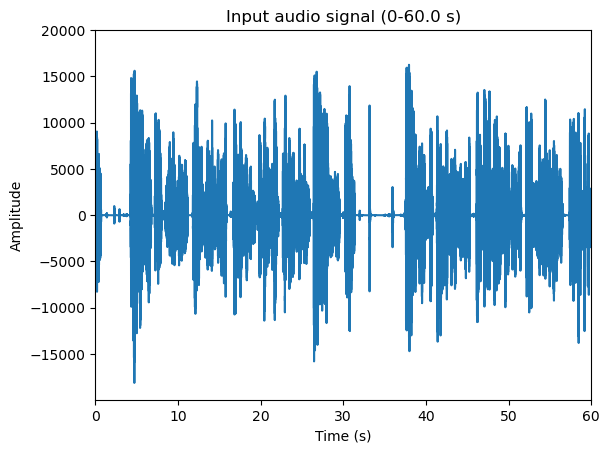

In [6]:
import numpy as np
from scipy.io.wavfile import read
import matplotlib.pyplot as plt

# Read audio data from file
sampling_rate, data = read('audio.wav')

# Calculate the duration of the audio data
duration = len(data) / sampling_rate

# Create a time vector for the x-axis of the plot
time = np.arange(0, duration, 1/sampling_rate)

# Set the duration to plot as the first minute
duration_to_plot = 60  # 60 seconds

# Plot the audio data for the first minute
fig, ax = plt.subplots()
ax.plot(time, data)
ax.set_xlim(0, duration_to_plot)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.set_title(f'Input audio signal (0-{duration_to_plot:.1f} s)')

plt.show()


## Install the following Libraries to run this project
pip install scipy pandas wave <br>
pip install google-cloud-speech <br>
pip install matplotlib <br>
pip install gtts <br>
pip install googletrans==4.0.0-rc1 <br>

## Import Statements below
from scipy.io.wavfile import read <br>
import matplotlib.pyplot as plt <br>
import gtts <br>
from googletrans import Translator <br>
import pandas as pd <br>
from google.cloud import speech <br>
import wave <br>
<br>
